* **Author :** Ruchit Vithani
* **ID :** 201701070
* **IT416 Lab 5:** Initialization of weights, Optimizers, Batch-norm and Dropout
* **Date :** 10-19-2020

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab5/Churn_Modelling.csv')
data1 = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data1 = data1[['Geography', 'Gender', "HasCrCard", "IsActiveMember","Tenure", "NumOfProducts", "Age", "CreditScore", "Balance", "EstimatedSalary", "Exited"]]
data1.head()

,Geography,Gender,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Age,CreditScore,Balance,EstimatedSalary,Exited
0,France,Female,1,1,2,1,42,619,0.00,101348.88,1
1,Spain,Female,0,1,1,1,41,608,83807.86,112542.58,0
2,France,Female,1,0,8,3,42,502,159660.80,113931.57,1
3,France,Female,0,0,1,2,39,699,0.00,93826.63,0
4,Spain,Female,1,1,2,1,43,850,125510.82,79084.10,0


# **Data Analysis**

### **Geography**

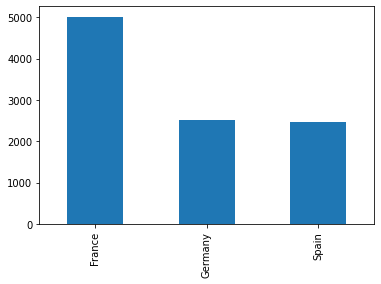

In [3]:
Geography = data1["Geography"].value_counts()
plt.figure()
Geography.plot(kind="bar")
plt.show()

### **Gender**

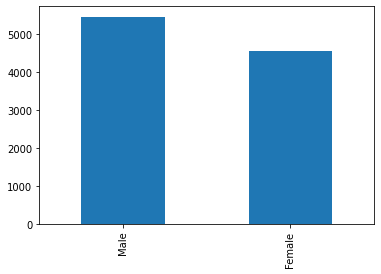

In [4]:
Gender = data1["Gender"].value_counts()
plt.figure()
Gender.plot(kind="bar")
plt.show()

### **HasCrCard**

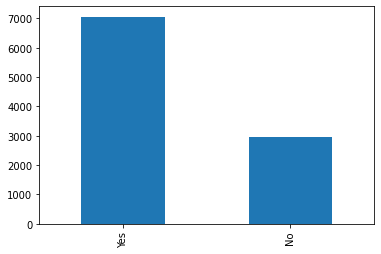

In [5]:
HasCrCard = data1["HasCrCard"].value_counts()
HasCrCard.index = ["Yes", "No"]
plt.figure()
HasCrCard.plot(kind="bar")
plt.show()

### **IsActiveMember**

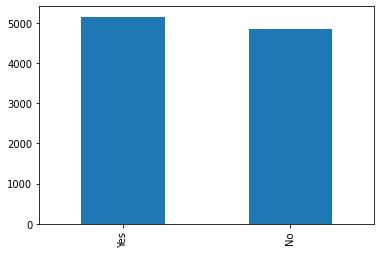

In [6]:
IsActiveMember = data1["IsActiveMember"].value_counts()
IsActiveMember.index = ["Yes", "No"]
plt.figure()
IsActiveMember.plot(kind="bar")
plt.show()

### **Tenure**

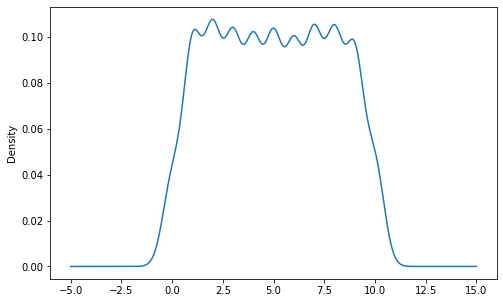

In [7]:
Tenure = data1["Tenure"]
plt.figure(figsize=(8, 5))
Tenure.plot(kind="kde")
plt.show()

### **NumOfProducts**

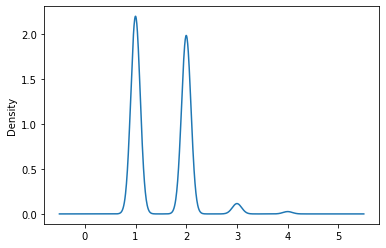

In [8]:
plt.figure()
NumOfProducts = data1["NumOfProducts"]
NumOfProducts.plot(kind="kde")
plt.show()

### **Age** 

Distribution of ages of people in the dataset. Max value of age is 92 and min value is 18. 

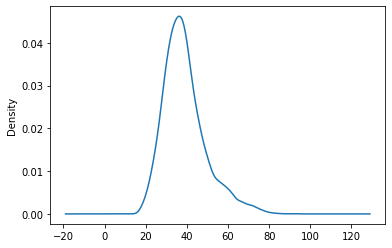

Maximum age :  92
Minimum age :  18


In [9]:
Age = data1["Age"]
plt.figure()
Age.plot(kind="kde")
plt.show()

print("Maximum age : ", max(Age))
print("Minimum age : ", min(Age))

### **CreditScore**

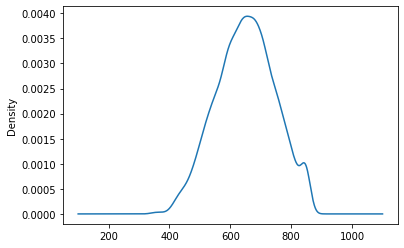

In [10]:
CreditScore = data1["CreditScore"]
plt.figure()
CreditScore.plot(kind="kde")
plt.show()

### **Balance**

Many users are there with 0 balance, and some of them are also having positive balance with mean around 120000.


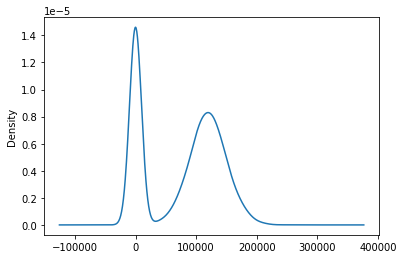

In [11]:
Balance = data1['Balance']
plt.figure()
Balance.plot(kind="kde")
plt.show()

### **EstimatedSalary**
From the plot below, we see that EstimatedSalary is nearly uniform for all the datapoints

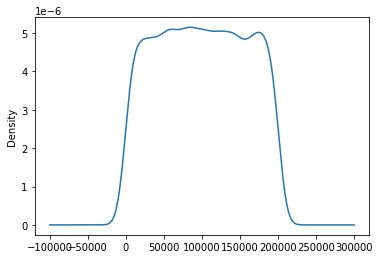

In [12]:
EstimatedSalary = data1["EstimatedSalary"]
plt.figure()
EstimatedSalary.plot(kind="kde")
plt.show()

### **Exited**

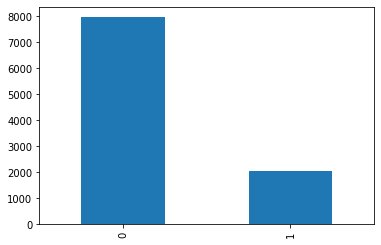

Percentage of clients exited =  20.369999999999997
Percentage of clients stayed =  79.63


In [13]:
Exited = data1["Exited"].value_counts()
plt.figure()
Exited.plot(kind="bar")
plt.show()
n1 = len(data1[data1["Exited"] == 1])
N = len(data1)
percent = (n1/N)*100
print("Percentage of clients exited = ", percent)
print("Percentage of clients stayed = ", 100 - percent)

# **Feature Engineering**

In [14]:
sc = StandardScaler()
non_categorical = ["Age","Tenure", "NumOfProducts", "CreditScore", "Balance", "EstimatedSalary"]
data1[non_categorical] = sc.fit_transform(data1[non_categorical])
data1.head()

,Geography,Gender,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Age,CreditScore,Balance,EstimatedSalary,Exited
0,France,Female,1,1,-1.041760,-0.911583,0.293517,-0.326221,-1.225848,0.021886,1
1,Spain,Female,0,1,-1.387538,-0.911583,0.198164,-0.440036,0.117350,0.216534,0
2,France,Female,1,0,1.032908,2.527057,0.293517,-1.536794,1.333053,0.240687,1
3,France,Female,0,0,-1.387538,0.807737,0.007457,0.501521,-1.225848,-0.108918,0
4,Spain,Female,1,1,-1.041760,-0.911583,0.388871,2.063884,0.785728,-0.365276,0


In [15]:
categories = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

data2 = []

for cat in categories:
    data2.append(pd.get_dummies(data1[cat], prefix=cat))
data2 = pd.concat(data2, axis=1)
data2.head()

print("\nDataset after one-hot encoding categorical features and normalising non-categorical features : \n")
data3 = pd.concat([data2, data1[non_categorical], data1["Exited"]], axis=1)
data3.head()


Dataset after one-hot encoding categorical features and normalising non-categorical features : 



,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Age,Tenure,NumOfProducts,CreditScore,Balance,EstimatedSalary,Exited
0,1,0,0,1,0,0,1,0,1,0.293517,-1.041760,-0.911583,-0.326221,-1.225848,0.021886,1
1,0,0,1,1,0,1,0,0,1,0.198164,-1.387538,-0.911583,-0.440036,0.117350,0.216534,0
2,1,0,0,1,0,0,1,1,0,0.293517,1.032908,2.527057,-1.536794,1.333053,0.240687,1
3,1,0,0,1,0,1,0,1,0,0.007457,-1.387538,0.807737,0.501521,-1.225848,-0.108918,0
4,0,0,1,1,0,0,1,0,1,0.388871,-1.041760,-0.911583,2.063884,0.785728,-0.365276,0


# **Train, Validation, Test split**

In [16]:
exited = data3[data1["Exited"]==1].drop(["Exited"], axis=1)
exited_labels = data3[data1["Exited"]==1]["Exited"]
exited_train, exited_test, exited_train_labels, exited_test_labels = train_test_split(exited, exited_labels, test_size=0.1)
exited_train, exited_val, exited_train_labels, exited_val_labels = train_test_split(exited_train, exited_train_labels, test_size=0.1)

not_exited = data3[data1["Exited"]==0].drop(["Exited"], axis=1)
not_exited_labels = data3[data1["Exited"]==0]["Exited"]
not_exited_train, not_exited_test, not_exited_train_labels, not_exited_test_labels = train_test_split(not_exited, not_exited_labels, test_size=0.1)
not_exited_train, not_exited_val, not_exited_train_labels, not_exited_val_labels = train_test_split(not_exited_train, not_exited_train_labels, test_size=0.1)

x_train = pd.concat((exited_train, not_exited_train), axis=0).to_numpy()
x_val = pd.concat((exited_val, not_exited_val), axis=0).to_numpy()
x_test = pd.concat((exited_test, not_exited_test), axis=0).to_numpy()

y_train = pd.concat((exited_train_labels, not_exited_train_labels), axis=0).to_numpy()
y_val = pd.concat((exited_val_labels, not_exited_val_labels), axis=0).to_numpy()
y_test = pd.concat((exited_test_labels, not_exited_test_labels), axis=0).to_numpy()

def shuffle(arr1, arr2):
    assert(arr1.shape[0] == arr2.shape[0])
    indices = np.arange(arr1.shape[0])
    np.random.shuffle(indices)
    arr1 = arr1[indices]
    arr2 = arr2[indices]

    return arr1, arr2

x_train, y_train = shuffle(x_train, y_train)
x_val, y_val = shuffle(x_val, y_val)
x_test, y_test = shuffle(x_test, y_test)

# **3.1 Task 1 (Weight Initialization)**
* Implement an Artificial Neural Network for Classification problem
* Take any architecture of your choice which gives a reasonable performance
* Train and validate the model with different Weight initialization techniques and make a comparative analysis \[use different cases like initializing with uniform distribution, glorot , HeNormal initialization\]. Also include a trivial case of initializing weights with 0s.
* You need to plot distribution curves for each case after training the model.
* Comment on the best initialization technique with proper reason. Comment on thevisualizations for each case.

In [17]:
def get_model_1(initializer):
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(16, input_shape=(15,), activation='tanh', kernel_initializer=initializer),
            tf.keras.layers.Dense(8, activation='tanh', kernel_initializer=initializer),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
    
    return model

In [18]:
def train_model(model, x_train, y_train, x_val, y_val):
    # Weights before training model
    W0 = model.get_weights()

    # Train the moodel
    history = model.fit(x_train, y_train, epochs=100, batch_size=25, verbose=0, validation_data=(x_val, y_val))

    # Weights after training the model
    W1 = model.get_weights()

    return W0, W1, history

def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    p1 = tf.reshape(tf.cast(predictions > 0.5, tf.float32), (x_test.shape[0], ))
    accuracy = tf.reduce_mean(tf.cast(p1 == y_test, tf.float32))
    return accuracy

### **Different Initializers**


1.   Random Uniform
2.   Random Normal
3.   Glorot 
4.   HeNormal
5.   Constant (value = 0)



In [19]:
inits = {
    'random_uniform' : initializers.RandomUniform(minval=-0.5, maxval=0.5),
    'random_normal' : initializers.RandomNormal(),
    'glorot_normal' : initializers.GlorotNormal(),
    'he_normal' : initializers.HeNormal(),
    'constant' : initializers.Constant(value=0)
}

In [20]:
history_train_all = []
accuracy_test_all = []
W0_all = []
W1_all = []
for k,v in inits.items():
    print("\nInitialization method : " +  k)
    model = get_model_1(v)
    W0, W1, history_train = train_model(model, x_train, y_train, x_val, y_val)
    accuracy = evaluate_model(model, x_test, y_test)

    history_train_all.append(history_train)
    accuracy_test_all.append(accuracy)

    W0_all.append(W0)
    W1_all.append(W1)

    print("Test set accuracy on this method : ", accuracy)


Initialization method : random_uniform
Test set accuracy on this method :  tf.Tensor(0.8611389, shape=(), dtype=float32)

Initialization method : random_normal
Test set accuracy on this method :  tf.Tensor(0.8681319, shape=(), dtype=float32)

Initialization method : glorot_normal
Test set accuracy on this method :  tf.Tensor(0.8611389, shape=(), dtype=float32)

Initialization method : he_normal
Test set accuracy on this method :  tf.Tensor(0.86613387, shape=(), dtype=float32)

Initialization method : constant
Test set accuracy on this method :  tf.Tensor(0.7962038, shape=(), dtype=float32)


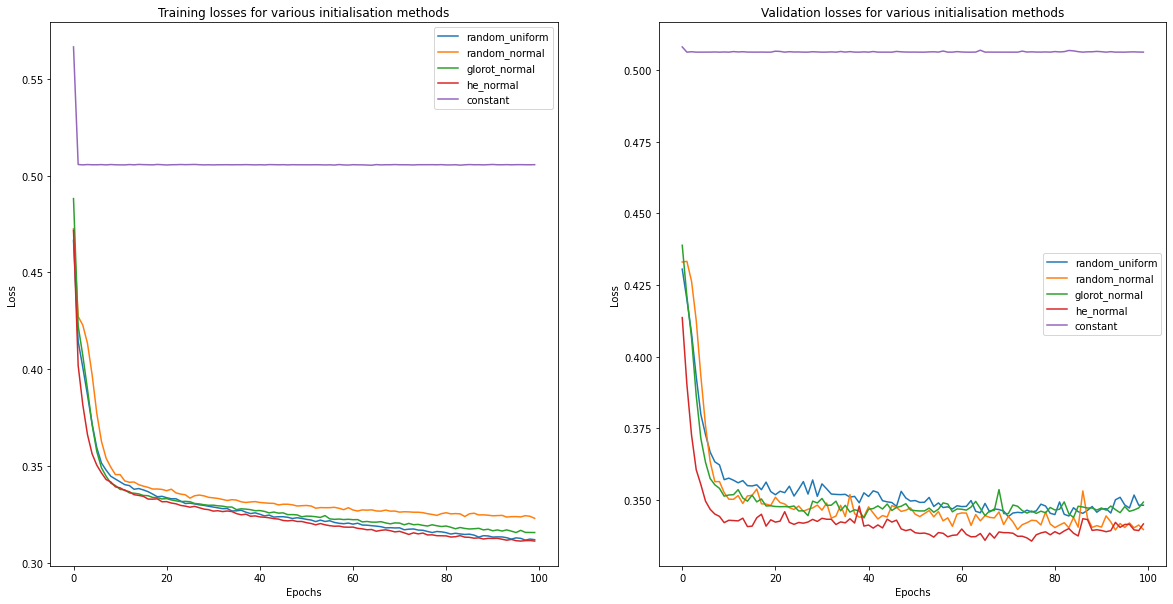

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for hist in history_train_all:
    plt.plot(hist.history["loss"])
plt.legend(list(inits.keys()))
plt.title("Training losses for various initialisation methods")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
for hist in history_train_all:
    plt.plot(hist.history["val_loss"])
plt.legend(list(inits.keys()))
plt.title("Validation losses for various initialisation methods")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### **Comments**
* Constant initialisation model rarely learns anything, and shows very poor performance. 
* Above graph shows that glorot normal and he_normal performs better than random normal initialisation or random uniform initization. 
* Random normal performs better than constant but performs poorer than he or glorot.

### **Visualising how wheights are changing for different initialisations**

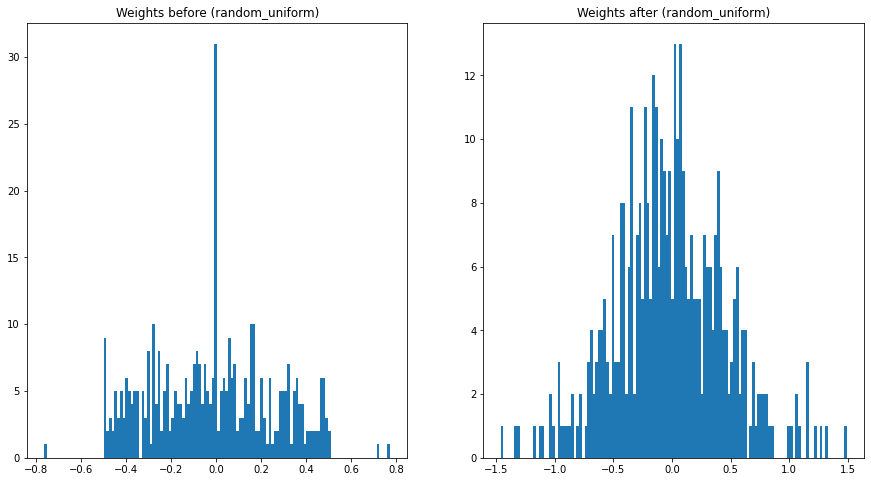

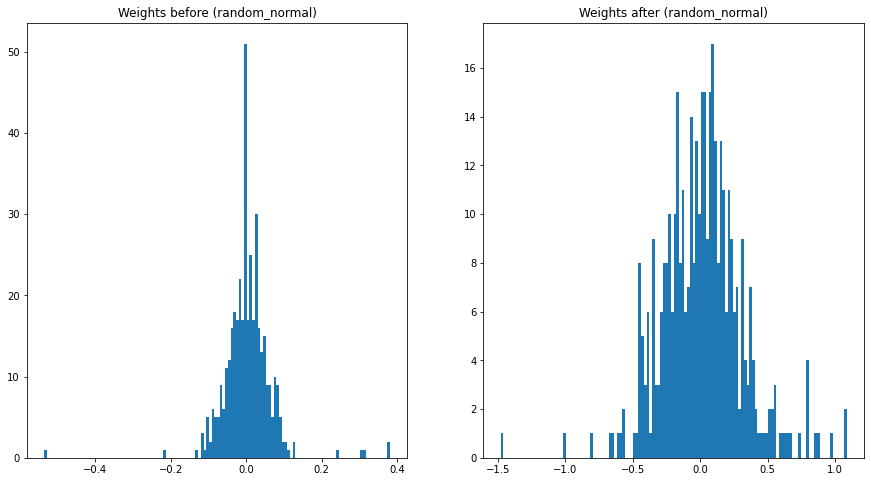

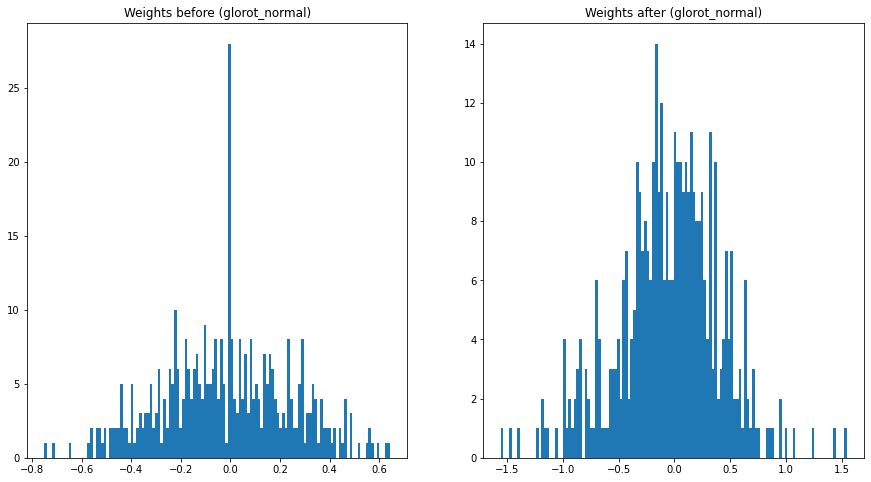

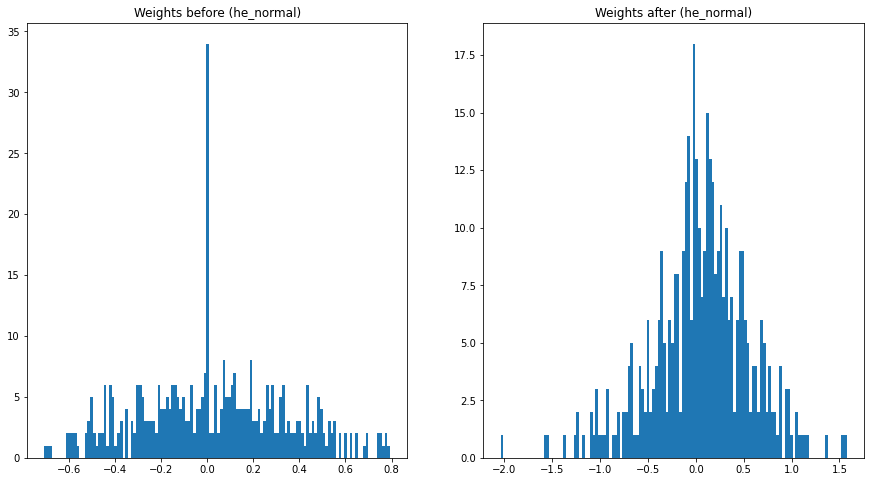

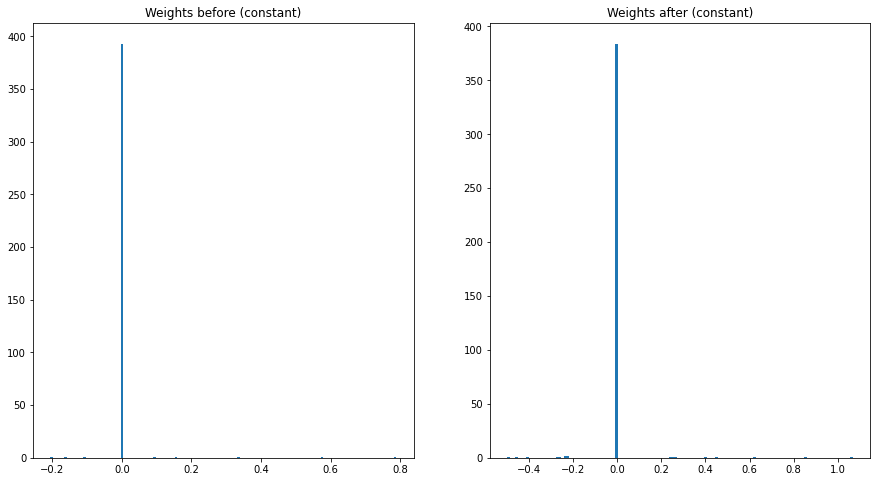

In [22]:
keys = list(inits.keys())
for i in range(5):
    plt.figure(figsize=(15, 8))
    weights_before = W0_all[i]
    weights_after = W1_all[i]

    weights_before = np.concatenate([w.ravel() for w in weights_before])
    weights_after = np.concatenate([w.ravel() for w in weights_after])

    idx = [0, 2]
    bins = 128
    plt.subplot(1, 2, 1)
    plt.hist(weights_before, bins)
    plt.title("Weights before ({})".format(keys[i]))
    plt.subplot(1, 2, 2)
    plt.hist(weights_after, bins)
    plt.title("Weights after ({})".format(keys[i]))
    plt.show()

### **Comments and analysis**

* Initializing all the weights with zeros leads the neurons to learn the same features during training. 
    
    * **Reason :** When we initialise all weights with constant value, each of the neuron will have same effect on the cost function because of identical weights on the neurons. Thus, the resulting gradients will also be identical. So, each neuron will evolve identically and so, each of them will learn the same features. 

* We observe that the network is abole to learn more number of parameters in case of he or glorot. In case of random uniform/normal, the output distribution is more similar to input distribution. So, we can conclude here that he/glorot initialisation is able to learn more weights than random normal/uniform. We discuss the reason as follows :

* To prevent the netwok from vanishing or exploding gradients, following two properties should hold. 
    * **Mean of activations should be zero**
    * **Variance of activations across all layers of neural net should be same.**

* Variance across layers is not same when we initialize the network with random normal/uniform. This violates the second point we discussed above. This limitation is improved in case of glorot, and so it also performs better empirically. 
* It has been proved that he is specifically designed for ReLU activations, whereas glorot has shown to perform better for sigmoid activations. 
    

# **3.2 Task 2 (Optimizers)**

* Implement an Artificial Neural Network for Classification problem
* Take any architecture of your choice
* Train and validate the model with different optimizers available in Keras and make a comparative analysis
* Comment on the best initialization technique

In [23]:
def get_model_2():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(16, input_shape=(15,), activation='tanh'),
            tf.keras.layers.Dense(8, activation='tanh'),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])    
    
    return model

In [24]:
opts = ['SGD', 
        'RMSprop',
        'Adam',
        'Adagrad',
        'Adadelta',
        'Nadam']

In [25]:
history_train_all = []
model = get_model_2()
model_copy = tf.keras.models.clone_model(model)
for opt in opts:
    print("\nOptimizer used : " +  opt)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history_train = model.fit(x_train, y_train, epochs=100, batch_size=25, verbose=0, validation_data=(x_val, y_val))

    predictions = model.predict(x_test)
    p1 = tf.reshape(tf.cast(predictions > 0.5, tf.float32), (x_test.shape[0], ))
    accuracy = tf.reduce_mean(tf.cast(p1 == y_test, tf.float32))

    history_train_all.append(history_train)

    model = tf.keras.models.clone_model(model_copy)
    print("Test set accuracy on this method : ", accuracy)


Optimizer used : SGD
Test set accuracy on this method :  tf.Tensor(0.86213785, shape=(), dtype=float32)

Optimizer used : RMSprop
Test set accuracy on this method :  tf.Tensor(0.8681319, shape=(), dtype=float32)

Optimizer used : Adam
Test set accuracy on this method :  tf.Tensor(0.8631369, shape=(), dtype=float32)

Optimizer used : Adagrad
Test set accuracy on this method :  tf.Tensor(0.8031968, shape=(), dtype=float32)

Optimizer used : Adadelta
Test set accuracy on this method :  tf.Tensor(0.7822178, shape=(), dtype=float32)

Optimizer used : Nadam
Test set accuracy on this method :  tf.Tensor(0.86013985, shape=(), dtype=float32)


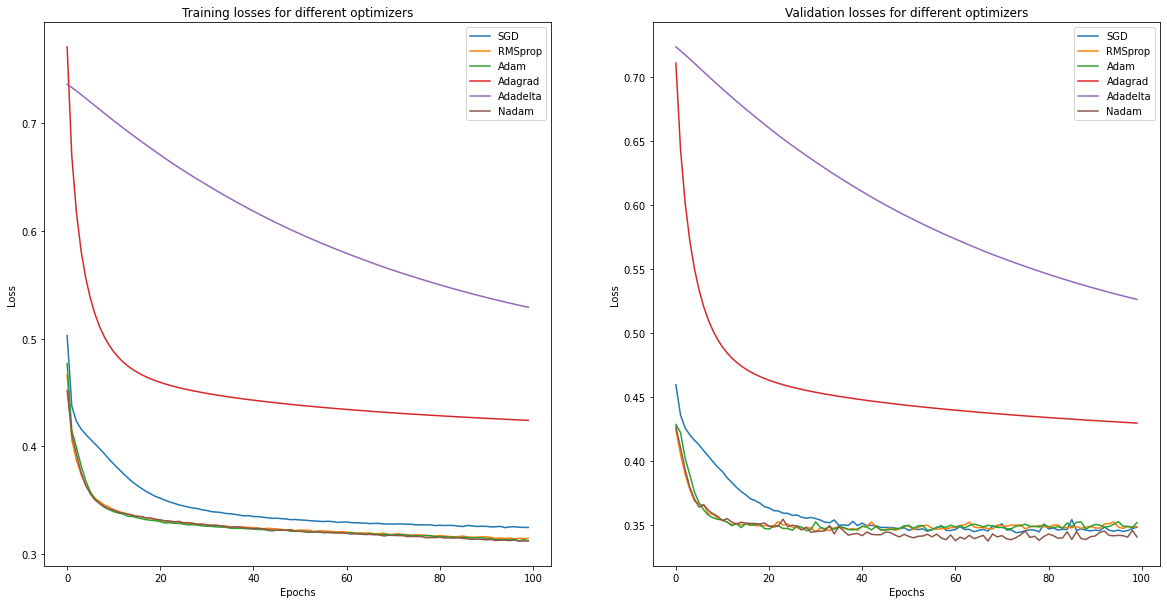

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for hist in history_train_all:
    plt.plot(hist.history["loss"])
plt.legend(opts)
plt.title("Training losses for different optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
for hist in history_train_all:
    plt.plot(hist.history["val_loss"])
plt.legend(opts)
plt.title("Validation losses for different optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### **Comments and analysis**

* **SGD :** Learning rate is fixed => Update in weights becomes smaller and smaller as we reach minima (because of vanishing gradients due to flatning of surface near minima). 

    * **Fixed learning rate is problematic since sometimes when we are far away from minima, we want to move faster (so smaller lr does not help here), and when we are closer to minima, we want to move slower (in order to avoid bypassing it).**

    * Also there are chances of stucking sgd in local minima because of the same reason described above (the updates become smaller and smaller as we approach any local minima).


* **Adagrad and Adadelta :** Both of them are very similar, adadelta is varient of adagrad. Adagrad updates the learning rate over time by dividing the learning rate in SGD with root square of accumulated gradients previously. The effect is has on the learning rate is : **It decays the learning rate over time (due to accumulation of gradients). So, it can be seen as MORE LEARNING RATE INITIALLY AND REDUCE THE LR OVER TIME AS WE APPROACH MINIMA.**

    * The reason adagrad and adadelta are performing a bit poorer in our case is due to small initialization of learning rate. Over time, since learning rate is reduced very much and so, the step size becomes smaller and smaller resulting in extremely slower convergence. 

* **Adam and varients :** Adam and its varients (nadam) use adaptive learning rate and momentum during optimization. The momentum term helps in rolling down the minima faster and adaptive learning rate helps in changing the learning rate during optimization and thus overcoming the both of the limitations of SGD described above. We also observe the performance imporvement for adam and nadam compared to SGD in case above. 

* **RMSProp :** RMSProp is very similar to Adagrad, but instead of accumulating normal gradients, it uses exponentially decaying average of previous gradients. This helps in giving more weights to previous gradients compared to weights in the past. This provides a momentum like term and so, we can see that RMSProp and Adam are performing very good and both of them show very similar results. 

# **3.3 Task 3 (Batch Normalization)**
* Train and Validate a simple Artificial Neural Network for Classification problem
* Use Batch Normalization (BN) technique and observe the difference. Comment and justify the application of this technique. Try both ways of using BN i.e.before and after calling the activation function

In [27]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

def get_model_3(before=False, after=False):
    if before:
        model = Sequential()
        model.add(Dense(16, input_shape=(15,)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dense(8))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dense(1))
        model.add(BatchNormalization())
        model.add(Activation('sigmoid'))
            
        model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
        # model.optimizer.lr = 0.001

        return model
    elif after:
        model = Sequential()
        model.add(Dense(16, input_shape=(15,), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(8, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
        # model.optimizer.lr = 0.001

        return model
    else:
        model = Sequential()
        model.add(Dense(16, input_shape=(15,), activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
        # model.optimizer.lr = 0.001

        return model

In [28]:
before = get_model_3(True, False)
after = get_model_3(False, True)
no_batch_norm = get_model_3()

models = [before, after, no_batch_norm]
legend = ["Before applying activations", "After applying activations", "No batch normalization"]
history_train_all = []
for i, model in enumerate(models):
    print("\nBatch Normalisation method : " +  legend[i])
    history_train = model.fit(x_train, y_train, epochs=200, batch_size=250, verbose=0, validation_data=(x_val, y_val))

    predictions = model.predict(x_test)
    p1 = tf.reshape(tf.cast(predictions > 0.5, tf.float32), (x_test.shape[0], ))
    accuracy = tf.reduce_mean(tf.cast(p1 == y_test, tf.float32))

    history_train_all.append(history_train)
    print("Test set accuracy on this method : ", accuracy)


Batch Normalisation method : Before applying activations
Test set accuracy on this method :  tf.Tensor(0.85814184, shape=(), dtype=float32)

Batch Normalisation method : After applying activations
Test set accuracy on this method :  tf.Tensor(0.8611389, shape=(), dtype=float32)

Batch Normalisation method : No batch normalization
Test set accuracy on this method :  tf.Tensor(0.8321678, shape=(), dtype=float32)


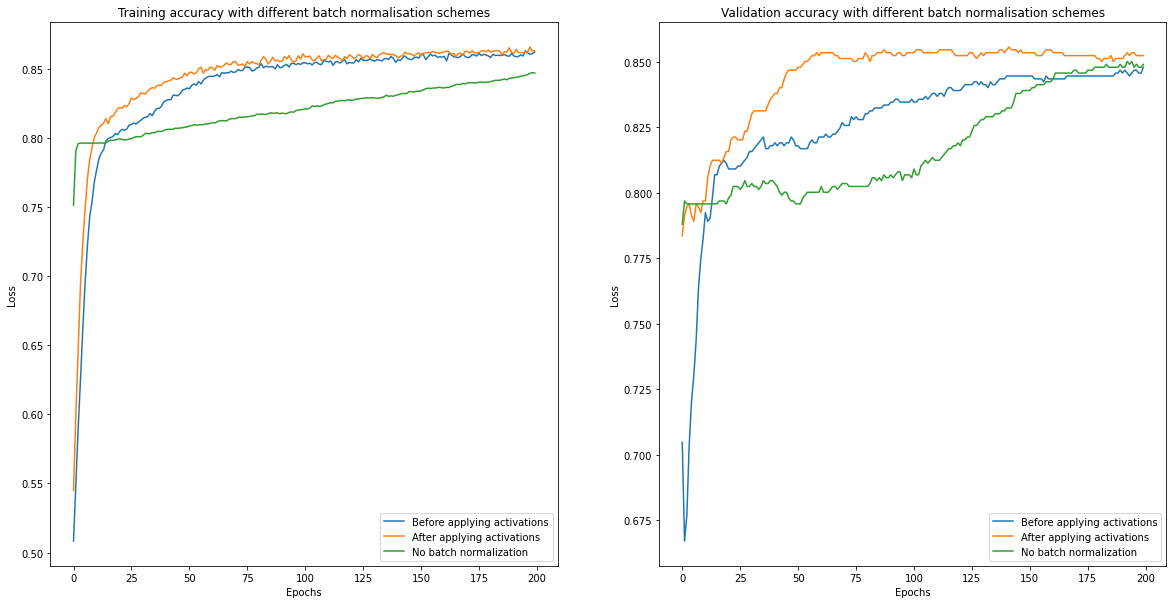

In [29]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for hist in history_train_all:
    plt.plot(hist.history["accuracy"])
plt.legend(legend)
plt.title("Training accuracy with different batch normalisation schemes")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
for hist in history_train_all:
    plt.plot(hist.history["val_accuracy"])
plt.legend(legend)
plt.title("Validation accuracy with different batch normalisation schemes")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### **Comments and analysis**
* WE observe that batch normalisation trains faster compared to training without batch normalisation. 
* Applying BN after activation yields better results. This also makes more sense since the input of next layer is activations of previous layer. So, applying batch normalisation after activations ensures zero mean and unit variance inputs for the next layer. 
* BN stabilizes the network by introducing two intermediate parameters "mean" and "standard deviation". This results in faster convergence of the neural network resulting in significant speedup. 


# **3.4 Task 4 (Dropout)**
* Train and Validate a simple Artificial Neural Network which overfits the dataset for Classification problem
* Try using dropouts in various layers, play around with it. Show your different observations which you get and choose the best configuration which reduces the overfitting. Make sure you use the same no. of layers as used for overfitting the model.

In [30]:
def get_model_4(rate=0):
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, input_shape=(15,), activation='tanh'),
            tf.keras.layers.Dropout(rate),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(rate),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(rate),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(rate),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
    
    return model

Test set accuracy when dropout=0 : 0.8251748085021973
Test set accuracy when dropout=0.2 : 0.8651348948478699
Test set accuracy when dropout=0.4 : 0.8701298832893372
Test set accuracy when dropout=0.5 : 0.8621378540992737
Test set accuracy when dropout=0.6 : 0.8591408729553223
Test set accuracy when dropout=0.8 : 0.8231768012046814


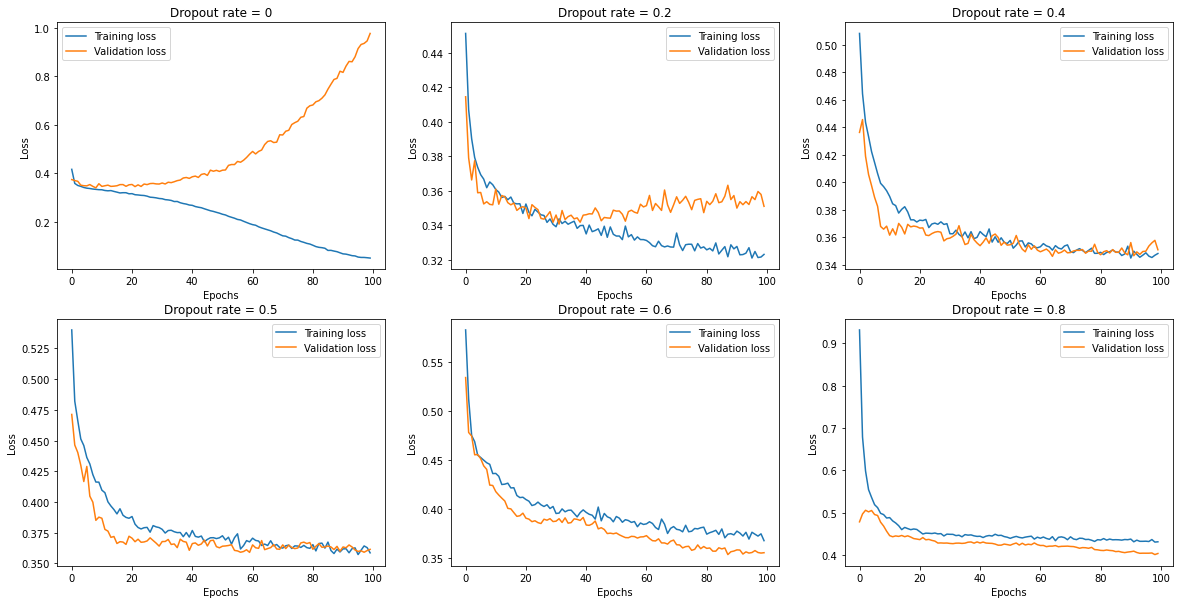

In [31]:
rates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]
i_=1
plt.figure(figsize=(20, 10))
for rate in rates:
    model = get_model_4(rate)
    history_train = model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=0, validation_data=(x_val, y_val))

    predictions = model.predict(x_test)
    p1 = tf.reshape(tf.cast(predictions > 0.5, tf.float32), (x_test.shape[0], ))
    accuracy = tf.reduce_mean(tf.cast(p1 == y_test, tf.float32))
    print("Test set accuracy when dropout={} : {}".format(rate, accuracy))


    plt.subplot(2, 3, i_)
    plt.plot(history_train.history["loss"])
    plt.plot(history_train.history["val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Training loss", "Validation loss"])
    plt.title("Dropout rate = {}".format(rate))
    i_ += 1
plt.show()

### **Comments and analysis**

* NN in top-left figure showes an overfitting model (since the validation loss is going up and up while training loss goind down at the same time). 
* As we increase dropout, we observe that validation loss starts moving towards training loss, and resulting into more generalisable model. 
* Finally, the last model is showing more loss on the test set, this might be because of too large dropout, which caused a biased model (high training and validation losses). Thus, it is very simple model and is not generalising well on the test set. 